In [1]:
import pandas as pd
pd.set_option('display.max_rows', 2000)
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import os
import sys
import inspect

# code to manage where are lunch the file
if str(os.getcwd()).split("/")[-1] == "notebooks":
    sys.path.insert(1, os.path.realpath(os.path.pardir))
    path_b = "../"
else:
    path_b ='./'
import config as c

In [2]:
windows = c.windows
number_crypto = c.number_cryptos
market_cap = c.market_cap

df = pd.read_csv(f"{path_b}data/processed/market_cap_crypto.csv", index_col=0)

df_close_price = pd.read_csv(f'{path_b}data/processed/close_price_crypto.csv', index_col=0)
df_close_price['date'] = pd.to_datetime(df_close_price.index)
df_close_price['date'] = df_close_price['date'].dt.date
df_close_price.index = df_close_price['date']
del df_close_price['date']

# processing part Data

In [3]:
## use market cap file

df_market_cap = pd.read_csv(f'{path_b}data/processed/crypto_date_marketcap_sorted_1e6.csv', index_col=0)


df_market_cap_first_20 = df_market_cap.iloc[:number_crypto]

#select last date
first_date = df_market_cap_first_20['first_date_marketcap'].tail(1).values

first_date_final = pd.to_datetime(first_date[0])

# TODO: change way to do it in the index
df_final_data = df_close_price.drop(df_close_price[df_close_price.index < first_date_final].index)
#print(df_final_data)
df_final_data = df_final_data[df_market_cap_first_20['crypto_name']]
df_final_data_return = df_final_data.pct_change().iloc[1:,:].fillna(0)
#df_final_data_return

/Users/guillaume/MyProjects/HECProject/qarm_2/project/venv/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [4]:
#Long Asset with Low Vol

df_vol = df_final_data_return.rolling(windows).std().fillna(0)[windows:]
df_vol.head(5)
#returns_vol_quantile = df_vol.T.apply(lambda x: pd.qcut(x, 5, labels=False, duplicates="drop"), axis=0).T

,peercoin,namecoin,litecoin,bitcoin,feathercoin,primecoin,ripple,nxt,dogecoin,omni,vertcoin,digibyte,reddcoin,dash,counterparty,monacoin,gulden,einsteinium,groestlcoin,maidsafecoin
date,,,,,,,,,,,,,,,,,,,,
2014-08-27,0.052622,0.048089,0.049611,0.026821,0.081631,0.060088,0.076462,0.072477,0.061859,0.131453,0.111339,0.106780,0.150446,0.171743,0.090216,0.0,0.110514,0.158291,0.167212,0.095662
2014-08-28,0.052701,0.048061,0.049395,0.026831,0.082767,0.060516,0.076464,0.072696,0.062004,0.131640,0.111288,0.100758,0.150461,0.171616,0.089978,0.0,0.110598,0.158163,0.167057,0.095373
2014-08-29,0.052661,0.047912,0.049387,0.026760,0.082852,0.060446,0.076469,0.072810,0.061987,0.132318,0.111335,0.100744,0.147327,0.171678,0.089862,0.0,0.110525,0.158100,0.166388,0.094989
2014-08-30,0.052530,0.047761,0.049217,0.026715,0.083705,0.060425,0.076456,0.073014,0.062123,0.132298,0.111318,0.100066,0.145583,0.171385,0.088958,0.0,0.110347,0.158561,0.166089,0.095372
2014-08-31,0.052806,0.048017,0.049567,0.027052,0.083805,0.060500,0.076291,0.073845,0.062090,0.132253,0.111435,0.099271,0.144331,0.170986,0.088448,0.0,0.110550,0.159169,0.165917,0.095351


In [6]:
returns_vol_quantile = df_vol.T.apply(lambda x: pd.qcut(x, 5, labels=False, duplicates="drop"), axis=0).T
returns_vol_quantile.head(5)

,peercoin,namecoin,litecoin,bitcoin,feathercoin,primecoin,ripple,nxt,dogecoin,omni,vertcoin,digibyte,reddcoin,dash,counterparty,monacoin,gulden,einsteinium,groestlcoin,maidsafecoin
date,,,,,,,,,,,,,,,,,,,,
2014-08-27,2,1,1,0,4,2,4,3,3,7,7,6,8,9,5,0,6,8,9,5
2014-08-28,2,1,1,0,4,2,4,3,3,7,7,6,8,9,5,0,6,8,9,5
2014-08-29,2,1,1,0,4,2,4,3,3,7,7,6,8,9,5,0,6,8,9,5
2014-08-30,2,1,1,0,4,2,4,3,3,7,7,6,8,9,5,0,6,8,9,5
2014-08-31,2,1,1,0,4,2,4,3,3,7,7,6,8,9,5,0,6,8,9,5


In [5]:
for i in returns_vol_quantile.columns:
    returns_vol_quantile.loc[returns_vol_quantile[i] == 0, i] = 0.5 # First quantile for vol
    returns_vol_quantile.loc[returns_vol_quantile[i] == 1, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 2, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 3, i] = 0
    returns_vol_quantile.loc[returns_vol_quantile[i] == 4, i] = -0.5

## Low Vol part ##
returns_low_vol_quantile = returns_vol_quantile.replace(0.5,1)
returns_low_vol_quantile = returns_low_vol_quantile.replace(-0.5,0)
returns_low_vol_quantile['sum'] = returns_low_vol_quantile.sum(axis=1)

#better to do things => here Low Vol portfolio
# Do the same things about High vol
for i in tqdm(returns_low_vol_quantile.index):
    number = returns_low_vol_quantile['sum'].loc[i]
    for column in returns_low_vol_quantile.columns:
        returns_low_vol_quantile[column].loc[i] = returns_low_vol_quantile[column].loc[i] / number
del returns_low_vol_quantile['sum']

## High Vol part ##

returns_high_vol_quantile = returns_vol_quantile.replace(-0.5,1)
returns_high_vol_quantile = returns_high_vol_quantile.replace(0.5,0)
returns_high_vol_quantile['sum'] = returns_high_vol_quantile.sum(axis=1)

#better to do things => here Low Vol portfolio
# Do the same things about High vol
for i in tqdm(returns_high_vol_quantile.index):
    number = returns_high_vol_quantile['sum'].loc[i]
    for column in returns_high_vol_quantile.columns:
        returns_high_vol_quantile[column].loc[i] = returns_high_vol_quantile[column].loc[i] / number
del returns_high_vol_quantile['sum']

100%|██████████| 1862/1862 [00:12<00:00, 153.08it/s]


In [6]:
df_final_data_return = df_final_data_return.loc[returns_low_vol_quantile.index,:]
low_vol_return = np.multiply(df_final_data_return, returns_low_vol_quantile)
low_vol_perf = np.sum(low_vol_return,1)

high_vol_return = np.multiply(df_final_data_return, returns_high_vol_quantile)
high_vol_perf = np.sum(high_vol_return,1)

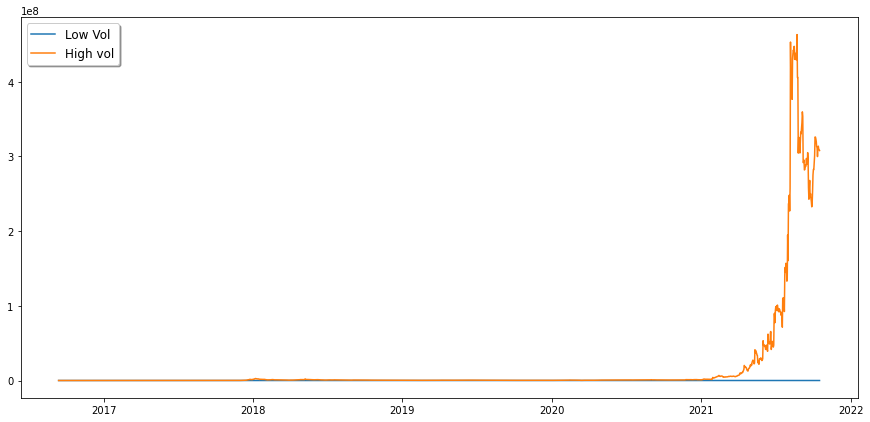

In [8]:
plt.figure(figsize=(15,7))

low_vol_perf.replace([np.inf, -np.inf], np.nan, inplace=True)
low_vol_perf.dropna(inplace=True)
low_vol_perf.iloc[0]=0
low_vol = (low_vol_perf+1).cumprod()*100
low_vol.to_csv(f"../data/processed/Low_Vol_{number_crypto}_price.csv")

high_vol_perf.iloc[0]=0
high_vol = (high_vol_perf+1).cumprod()*100
high_vol.to_csv(f"../data/processed/High_Vol_{number_crypto}_price.csv")


plt.plot(low_vol)
plt.plot(high_vol)
plt.legend(['Low Vol', 'High vol'],loc='upper left',fontsize='large',fancybox=True, shadow=True)
plt.show()